In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **LIBRARY**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_curve, auc, precision_recall_curve
# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from xgboost import XGBClassifier
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# regression error metrics - scikit-learn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# regression error metrics - scikit-learn
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.eval_measures import meanabs

# Some tests/statistics required for validating assumptions
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

## **DATA PREP DO VIF AND THEN PROCEED WITH LASSO**

In [ ]:
#file after VIF
VIF = pd.read_csv('/content/drive/MyDrive/Humana/After_VIF_revised.csv')

In [ ]:
VIF.shape

(605, 3)

In [ ]:
features_to_retain = VIF[VIF['VIF_Factor'] < 10]['features']

In [ ]:
features_to_retain.shape #these are the features that are retained after VIF

(542,)

We are retaining 542 features which are having VIF <10 as with values of 10 or more being regarded as very highly correlated.

In [ ]:
# The dataset which has no missing values
df_head = pd.read_csv('/content/drive/MyDrive/Humana/final_df_revised.csv',index_col=0)


In [ ]:
df_head.shape # the shape of the file after removing all missing values and pre processing
#it has 621 columns which includes all the dummy variables of the

(48272, 621)

In [ ]:
df_head.isnull().sum().sum() # no missing value

0

In [ ]:
df_head.dtypes[df_head.dtypes =='object']

cons_mobplus             object
cms_ra_factor_type_cd    object
cons_homstat             object
sex_cd                   object
rucc_category            object
sex_cd.1                 object
dtype: object

cons_mobplus             object
cms_ra_factor_type_cd    object
cons_homstat             object
sex_cd                   object
rucc_category            object
sex_cd.1                 object


In [ ]:
#kd = [cms_race_cd, cms_race_cd_1, cms_race_cd_2, cms_race_cd_5, sex_cd]
#df_head.drop(['cms_race_cd', 'cms_race_cd_1', 'cms_race_cd_2', 'cms_race_cd_5', 'sex_cd','sex_cd.1'],axis=1,inplace=True)
df_head.drop(['sex_cd.1','index'],axis=1,inplace=True)
#df_head.drop(['cms_race_cd','sex_cd'],axis=1,inplace=True)
#df_head['cms_race_cd']

In [ ]:
con_df_after_VIF = df_head[features_to_retain.values]

In [ ]:
con_df_after_VIF.shape

(48272, 542)

In [ ]:
df_head.iloc[:,605:].dtypes

id                             float64
cons_mobplus                    object
cms_ra_factor_type_cd           object
cons_homstat                    object
sex_cd                          object
rucc_category                   object
cms_race_cd                      int64
cms_disabled_ind                 int64
cmsd2_men_mad_ind                int64
rwjf_drinkwater_violate_ind    float64
cms_dual_eligible_ind            int64
cms_low_income_ind               int64
cms_frailty_ind                  int64
hi_flag                          int64
dtype: object

In [ ]:
df_head.iloc[:,605:]

,id,cons_mobplus,cms_ra_factor_type_cd,cons_homstat,sex_cd,rucc_category,cms_race_cd,cms_disabled_ind,cmsd2_men_mad_ind,rwjf_drinkwater_violate_ind,cms_dual_eligible_ind,cms_low_income_ind,cms_frailty_ind,hi_flag
0,100039218.0,M,CN,R,M,3-Metro,1,0,0,1.0,0,0,0,0
1,100042427.0,M,CN,Y,F,1-Metro,6,0,1,0.0,0,1,0,0
2,100055103.0,S,CN,U,F,2-Metro,1,0,1,0.0,0,0,0,0
3,100074556.0,U,CF,U,F,2-Metro,2,0,0,1.0,1,1,0,0
4,100079932.0,U,CP,U,M,5-Nonmetro,1,1,0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48267,999894944.0,U,CN,U,M,9-Nonmetro,1,1,0,0.0,0,0,0,0
48268,999918135.0,M,E,R,F,3-Metro,1,0,1,0.0,0,0,0,0
48269,999954890.0,M,CN,Y,F,1-Metro,1,1,1,1.0,0,0,0,0
48270,999967770.0,S,CN,Y,M,3-Metro,1,0,1,1.0,0,0,0,0


In [ ]:
cat_df_after_VIF = df_head.iloc[:,605:]

In [ ]:
cat_df_after_VIF.shape

(48272, 14)

In [ ]:
df_after_VIF = pd.concat([con_df_after_VIF,cat_df_after_VIF],axis=1)
df_after_VIF.shape

(48272, 556)

## **DROP ANY REDUNDANT FEATURES AND SEPARATE CONTINUOUS AND CATEGORICAL**

In [ ]:
df_after_VIF.drop('id',axis=1,inplace=True)

In [ ]:
cols_for_chi = ['cons_mobplus', 'cms_ra_factor_type_cd', 'cons_homstat', 'sex_cd',
       'rucc_category', 'cms_race_cd', 'cms_disabled_ind', 'cmsd2_men_mad_ind',
       'rwjf_drinkwater_violate_ind', 'cms_dual_eligible_ind',
       'cms_low_income_ind', 'cms_frailty_ind', 'hi_flag']

In [ ]:
from collections import Counter
cont_fea = list((Counter(list(df_after_VIF.columns))-Counter(cols_for_chi)).elements())

## **DUMMY**

In [ ]:
df_cols_for_chi = df_after_VIF[cols_for_chi]

In [ ]:
df_dummies = pd.get_dummies(df_cols_for_chi,drop_first=True,columns=df_cols_for_chi.columns)

In [ ]:
df_dummies.shape

(48272, 36)

In [ ]:
# from collections import Counter
# cont_fea = list((Counter(list(df_after_VIF.columns))-Counter(cols_for_chi)).elements())

## **COMBINING CONTINUOUS AND CATEGORICAL DATAFRAMES**

In [ ]:
# from collections import Counter
# cont_fea = list((Counter(list(df_after_VIF.columns))-Counter(cols_for_chi)).elements())

In [ ]:
df_lasso_model = pd.concat([df_after_VIF[cont_fea],df_dummies],axis=1)
df_lasso_model.shape

(48272, 578)

In [ ]:
df_lasso_model['hi_flag_1'].value_counts()

0    46158
1     2114
Name: hi_flag_1, dtype: int64

# Modeling Starts

In [ ]:
lasso_fea = ['rx_hum_28_pmpm_ct',
 'cnt_cp_print_0',
 'rx_hum_81_pmpm_cost',
 'cnt_cp_print_1',
 'cnt_cp_print_7',
 'cmsd2_sns_digest_abdomen_pmpm_ct',
 'atlas_naturalchangerate1016',
 'rx_hum_91_pmpm_ct',
 'rx_nonmail_pmpm_ct',
 'rx_hum_16_pmpm_ct',
 'cnt_cp_print_8',
 'rx_hum_05_pmpm_ct',
 'cnt_cp_vat_11',
 'cnt_cp_vat_5',
 'cnt_cp_vat_6',
 'total_ip_acute_allowed_pmpm_cost',
 'cons_ccip',
 'rx_days_since_last_script',
 'atlas_net_international_migration_rate',
 'cnt_cp_print_2',
 'cnt_cp_emails_7',
 'rx_hum_24_pmpm_ct',
 'rx_hum_77_pmpm_ct',
 'rx_hum_68_pmpm_ct',
 'rx_phar_cat_cvs_pmpm_ct',
 'cnt_cp_print_9',
 'cmsd2_inj_substances_pmpm_ct',
 'rev_pm_ct_pmpm_cd_ct',
 'rx_pharmacies_pmpm_ct',
 'cnt_cp_vat_2',
 'rx_branded_pmpm_ct',
 'cnt_cp_print_6',
 'rx_hum_76_pmpm_ct',
 'rwjf_hiv_rate',
 'total_physician_office_allowed_pmpm_cost',
 'cmsd2_skn_radiation_pmpm_ct',
 'rx_phar_cat_walgreen_pmpm_ct',
 'cnt_cp_print_4',
 'bh_otsl_pmpm_ct',
 'rx_bh_pmpm_ct',
 'cnt_cp_print_10',
 'atlas_orchard_farms12',
 'rx_hum_90_pmpm_ct',
 'cnt_cp_emails_2',
 'cnt_cp_emails_3',
 'cms_rx_risk_score_nbr',
 'rx_perphy_pmpm_ct',
 'rx_hum_51_pmpm_ct',
 'cons_mobplus_P',
 'cons_mobplus_S',
 'cons_mobplus_U',
 'cms_ra_factor_type_cd_CN',
 'cms_ra_factor_type_cd_E',
 'cms_ra_factor_type_cd_U',
 'cons_homstat_R',
 'cons_homstat_U',
 'cons_homstat_Y',
 #'sex_cd_M',
 'rucc_category_2-Metro',
 'rucc_category_3-Metro',
 'rucc_category_4-Nonmetro',
 'rucc_category_5-Nonmetro',
 'rucc_category_6-Nonmetro',
 'rucc_category_7-Nonmetro',
 'rucc_category_9-Nonmetro',
 #'cms_race_cd_1',
 #'cms_race_cd_2',
 #'cms_race_cd_5',
 'cms_disabled_ind_1',
 'cmsd2_men_mad_ind_1',
 'rwjf_drinkwater_violate_ind_1.0',
 'cms_low_income_ind_1',
 'cms_frailty_ind_1',
 'hi_flag_1']



extra_fea = [
 'rwjf_homicides_rate',
 'cons_ccip',
 'atlas_age65andolderpct2010',
 'rwjf_child_mortality',
 'rwjf_median_house_income',
 'cmsd2_end_malnut_pmpm_ct'
]

In [ ]:
df_lasso_model = df_lasso_model[lasso_fea]

In [ ]:
#temp = pd.read_csv('/content/drive/MyDrive/Humana competition/2022_Competition_Training.csv')

In [ ]:
cols_ct = df_head.columns

claims_per_month_mental = df_head[list(cols_ct[cols_ct.str.contains('cmsd2_men', case=False, na=False)])+list(cols_ct[cols_ct.str.contains('cmsd1_men', case=False, na=False)])].sum(axis=1)

claims_per_month_injury = df_head[list(cols_ct[cols_ct.str.contains('cmsd2_inj', case=False, na=False)])].sum(axis=1)

claims_per_month_inf = df_head[list(cols_ct[cols_ct.str.contains('cmsd2_inf', case=False, na=False)])+list(cols_ct[cols_ct.str.contains('cmsd1_inf', case=False, na=False)])].sum(axis=1)

claims_per_month_res = df_head[list(cols_ct[cols_ct.str.contains('cmsd2_res', case=False, na=False)])+list(cols_ct[cols_ct.str.contains('cmsd1_res', case=False, na=False)])+list(cols_ct[cols_ct.str.contains('cmsd2_ano', case=False, na=False)])+list(cols_ct[cols_ct.str.contains('cmsd2_sns', case=False, na=False)])].sum(axis=1)

In [ ]:
df_extra_features = pd.DataFrame()
df_extra_features = df_head[extra_fea].copy()
df_extra_features['claims_pm_mental'] = claims_per_month_mental
df_extra_features['claims_pm_injury'] = claims_per_month_injury
df_extra_features['claims_pm_inf'] = claims_per_month_inf
df_extra_features['claims_pm_res'] = claims_per_month_res


In [ ]:
updated_model = pd.concat([df_extra_features,df_lasso_model],axis=1)

# **UPDATED DATAFRAME WITH EXTRA FEATURES**

In [ ]:
updated_model.shape   ####

(48272, 80)

## **LASSO VIF DATAFRAME**

In [ ]:
y  = updated_model['hi_flag_1']
X = updated_model.drop('hi_flag_1',axis=1)

X = X.loc[:,~X.columns.duplicated()]

In [ ]:
updated_model_with_VIF = pd.concat([X,y],axis=1)

In [ ]:
lasso_with_VIF = updated_model_with_VIF

In [ ]:
lasso_with_VIF.shape

(48272, 79)

In [ ]:
dff_1 = lasso_with_VIF[lasso_with_VIF['hi_flag_1']==1]
dff_0 = lasso_with_VIF[lasso_with_VIF['hi_flag_1']==0]

In [ ]:
print(dff_0.shape, dff_1.shape)

(46158, 79) (2114, 79)


In [ ]:
dff_0_resample = dff_0.sample(n=5000, replace = False, random_state =1)
print(dff_0_resample.shape)

(5000, 79)


In [ ]:
dff_f = pd.concat([dff_0_resample,dff_1])

In [ ]:
dff_f.shape

(7114, 79)

In [ ]:
y = dff_f['hi_flag_1']
X = dff_f.drop('hi_flag_1', axis=1)

X = X.loc[:,~X.columns.duplicated()]

In [ ]:
print(X.shape)
print(y.value_counts())

(7114, 78)
0    5000
1    2114
Name: hi_flag_1, dtype: int64


## **Split**

In [ ]:
indices = list(X.index)
(
    X_train,
    X_test,
    y_train,
    y_test,
    indices_train,
    indices_test,
) = train_test_split(X, y, indices, test_size=0.2,stratify=y)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5691, 78) (1423, 78) (5691,) (1423,)


# XGBoost

In [ ]:
# param_grid = {
#     "max_depth": [3, 4, 5, 7],
#     "learning_rate": [0.1, 0.01, 0.05],
#     "gamma": [0, 0.25, 1],
#     "reg_lambda": [0, 1, 10],
#     "scale_pos_weight": [1, 3, 5],
#     "subsample": [0.1, 0.3, 0.5, 0.8],
#     "colsample_bytree": [0.5],
# }

In [ ]:
# #call the model
# xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# num_folds = 10
# seed = 7
# # Init Grid Search
# kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=kfold, scoring="roc_auc")

In [ ]:
# grid_cv.fit(X_train, y_train)

In [ ]:
# grid_cv.best_score_

In [ ]:
# grid_cv.best_params_

In [ ]:
#xgb_cl = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 0.25, learning_rate = 0.1, max_depth = 4, reg_lambda = 1,scale_pos_weight = 1, subsample = 0.8, objective="binary:logistic")
#xgb_cl = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, learning_rate = 0.1, max_depth = 3, reg_lambda = 1,scale_pos_weight = 1, subsample = 0.8, objective="binary:logistic")
#xgb_cl = xgb.XGBClassifier(min_child_weight = 2, booster = 'dart', colsample_bytree = 0.3, gamma = 1, learning_rate = 0.1, max_depth = 3, reg_lambda = 1,scale_pos_weight = 2.30, subsample = 1, objective="binary:logistic", early_stopping_rounds = 10)#best
#xgb_cl = xgb.XGBClassifier(min_child_weight = 4, booster = 'dart', colsample_bytree = 0.5, gamma = 1, learning_rate = 0.1, max_depth = 3, reg_lambda = 1,scale_pos_weight = 2.30, subsample = 1, objective="binary:logistic", early_stopping_rounds = 10)#best
xgb_cl = xgb.XGBClassifier(min_child_weight = 4, booster = 'dart', colsample_bytree = 1, gamma = 0, learning_rate = 0.1, max_depth = 3, reg_lambda = 0,scale_pos_weight = 2.30, subsample = 0.5, objective="binary:logistic", early_stopping_rounds = 10)#best

In [ ]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(booster='dart', early_stopping_rounds=10, min_child_weight=4,
              reg_lambda=0, scale_pos_weight=2.3, subsample=0.5)

In [ ]:
# Predict
ytrain_preds = xgb_cl.predict(X_train)
ytest_preds = xgb_cl.predict(X_test)

In [ ]:
testResults = classification_report(y_test,ytest_preds) # (actual, predicted)
print(testResults)

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1000
           1       0.48      0.66      0.56       423

    accuracy                           0.69      1423
   macro avg       0.65      0.68      0.66      1423
weighted avg       0.73      0.69      0.70      1423



In [ ]:
y_proba =xgb_cl.predict_proba(X_test)# predicting the probability
precision, recall, thresholds = precision_recall_curve(y_test, y_proba[:,1])

In [ ]:
f1_scores = 2*recall*precision/(recall+precision)
optimal_idx = np.argmax(f1_scores)

<ipython-input-61-8de18aeb4d0e>:1: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = 2*recall*precision/(recall+precision)


In [ ]:
print(recall[optimal_idx])
print(precision[optimal_idx])
print(f1_scores[optimal_idx])
print(thresholds[optimal_idx])# the optimal threshold

0.0
0.0
nan
0.9694611


In [ ]:
preds1 =  y_proba[:,1] > 0.46716297

In [ ]:
print(roc_auc_score(y_test, y_proba[:,1]))
#print(roc_auc_score(y_test, preds1))

0.7389361702127659


In [ ]:
from sklearn.metrics import precision_recall_curve
#actual classification report
testResults = classification_report(y_test,preds1) # (actual, predicted)
print(testResults)

              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1000
           1       0.47      0.70      0.56       423

    accuracy                           0.67      1423
   macro avg       0.65      0.68      0.65      1423
weighted avg       0.73      0.67      0.69      1423



In [ ]:
ytrain_proba =xgb_cl.predict_proba(X_train)

In [ ]:
preds2 =  ytrain_proba[:,1] > 0.46716297

In [ ]:
trainResults = classification_report(y_train,preds2) # (actual, predicted)
print(trainResults)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      4000
           1       0.54      0.79      0.64      1691

    accuracy                           0.74      5691
   macro avg       0.71      0.75      0.72      5691
weighted avg       0.78      0.74      0.75      5691



# Disparity Score

In [ ]:
# RACE
df_race_disparity = pd.DataFrame()
df_race_disparity['preds'] = preds1 # give your test predictions here
df_race_disparity['race_cd'] = df_head.loc[indices_test,'cms_race_cd'].values # give parent dataframe and test indices from train_test_split
df_race_disparity['gt'] = y_test


# GENDER DISPARITY
df_gender_disparity = pd.DataFrame()
df_gender_disparity['preds'] = preds1
df_gender_disparity['gender'] = df_head.loc[indices_test,'sex_cd'].values
df_gender_disparity['gt'] = y_test

# Our metrics
def metric1(y_preds,y_actual):   # Predicted positive rate
  tn, fp, fn, tp = confusion_matrix(y_actual, y_preds).ravel()
  accuracy = tp/(tp+fp)
  return accuracy

def metric2(y_proba,y_actual): # AUC
  fpr, tpr, thresholds = metrics.roc_curve(y_actual, yproba[:,0], pos_label=1)
  return(metrics.auc(fpr, tpr))


Male_df  = df_gender_disparity[df_gender_disparity['gender'] == 'M']
Female_df = df_gender_disparity[df_gender_disparity['gender'] == 'F']

male_accuracy = metric1(Male_df['preds'],Male_df['gt'])
female_accuracy = metric1(Female_df['preds'],Female_df['gt'])

# Our dataframes
female_metric = min(female_accuracy/male_accuracy,1)*100
male_metric = min(male_accuracy/male_accuracy,1)*100



##################### RACE
df0  = df_race_disparity[df_race_disparity['race_cd'] == 0]
df1  = df_race_disparity[df_race_disparity['race_cd'] == 1]
df2  = df_race_disparity[df_race_disparity['race_cd'] == 2]
df3  = df_race_disparity[df_race_disparity['race_cd'] == 3]
df4  = df_race_disparity[df_race_disparity['race_cd'] == 4]
df5  = df_race_disparity[df_race_disparity['race_cd'] == 5]
df6  = df_race_disparity[df_race_disparity['race_cd'] == 6]

accuracy0 = metric1(df0['preds'],df0['gt'])
accuracy1 = metric1(df1['preds'],df1['gt'])
accuracy2 = metric1(df2['preds'],df2['gt'])
accuracy3 = metric1(df3['preds'],df3['gt'])
accuracy4 = metric1(df4['preds'],df4['gt'])
accuracy5 = metric1(df5['preds'],df5['gt'])
accuracy6 = metric1(df6['preds'],df6['gt'])

metric0 = min(accuracy0/accuracy1,1)*100
metric1 = min(accuracy1/accuracy1,1)*100
metric2 = min(accuracy2/accuracy1,1)*100
metric3 = min(accuracy3/accuracy1,1)*100
metric4 = min(accuracy4/accuracy1,1)*100
metric5 = min(accuracy5/accuracy1,1)*100
metric6 = min(accuracy6/accuracy1,1)*100



total_metric = (female_metric+male_metric+metric0 +  metric1 + metric2 + metric3 + metric4 + metric5 + metric6)/9

print(total_metric)

95.79412375220568


In [ ]:
print(female_metric)
print(male_metric)
print(metric0)
print(metric1)
print(metric2)
print(metric3)
print(metric4)
print(metric5)
print(metric6)


86.26058894715611
100.0
100
100.0
100
100
75.88652482269504
100
100


# **Model Performance**

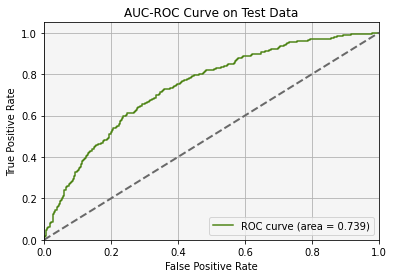

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])

import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.plot(fpr, tpr,color='#4e8416',label="ROC curve (area = %0.3f)" % roc_auc_score(y_test, y_proba[:,1]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1],color='dimgrey',lw=2, linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve on Test Data')
plt.grid()
plt.legend(loc="lower right")
plt.show()

##confusion matrix

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.matplotlib.rc('font', **font)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


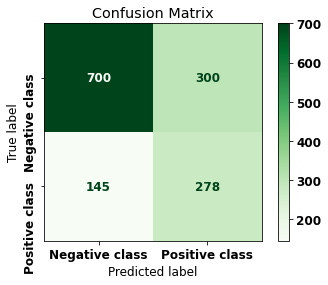

In [ ]:
fig = plot_confusion_matrix(xgb_cl, X_test, y_test, display_labels=['Negative class', 'Positive class'], cmap='Greens')
plt.title('Confusion Matrix')
plt.yticks(rotation=90)
plt.show()

(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

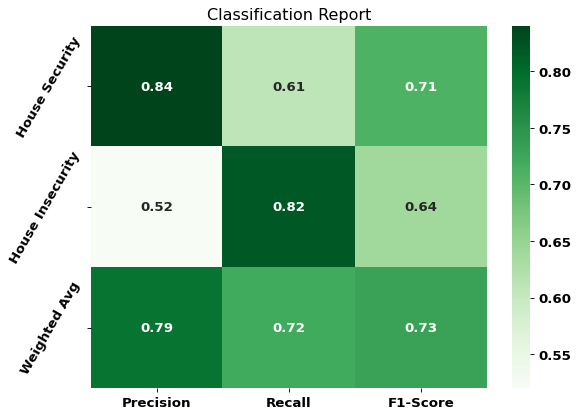

In [ ]:

lst1 = ['House Security','House Insecurity','Weighted Avg']
lst2 = [0.84,0.52,0.79]
lst3 = [0.61,0.82,0.72]
lst4 = [0.71,0.64,0.73]

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

# Calling DataFrame constructor after zipping
# both lists, with columns specified
df_classification_report = pd.DataFrame(list(zip(lst2, lst3, lst4)),
               columns =['Precision', 'Recall','F1-Score'])
sns.heatmap(df_classification_report, annot=True, cmap='Greens',yticklabels=lst1)
plt.title('Classification Report')
plt.yticks(rotation=60)



In [ ]:
y_proba

array([[0.47280496, 0.52719504],
       [0.6363873 , 0.3636127 ],
       [0.41932368, 0.5806763 ],
       ...,
       [0.88751376, 0.11248626],
       [0.16031522, 0.8396848 ],
       [0.85661423, 0.14338575]], dtype=float32)

<function matplotlib.pyplot.show(*args, **kw)>

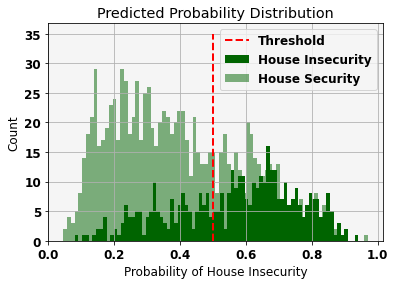

In [ ]:
list_prob = y_proba[:,1].tolist()
list_y = y_test.tolist()
df_prob_distribution = pd.DataFrame(list(zip(list_prob,list_y)),
               columns =['Probability','Target'])

df_pro_dis_1 = df_prob_distribution[df_prob_distribution['Target']==1]
df_pro_dis_0 = df_prob_distribution[df_prob_distribution['Target']==0]
plt.hist(df_pro_dis_1['Probability'],fill = True, bins=80,color ='darkgreen')
plt.hist(df_pro_dis_0['Probability'],fill = True, bins=80,color ='darkgreen',alpha=0.5)
plt.plot([0.5,0.5], [0, 35],color='red',lw=2, linestyle="--")
plt.xlabel('Probability of House Insecurity')
plt.ylabel('Count')
plt.title('Predicted Probability Distribution')
plt.legend(['Threshold','House Insecurity','House Security'])
plt.grid()
plt.show

# Feature Importance

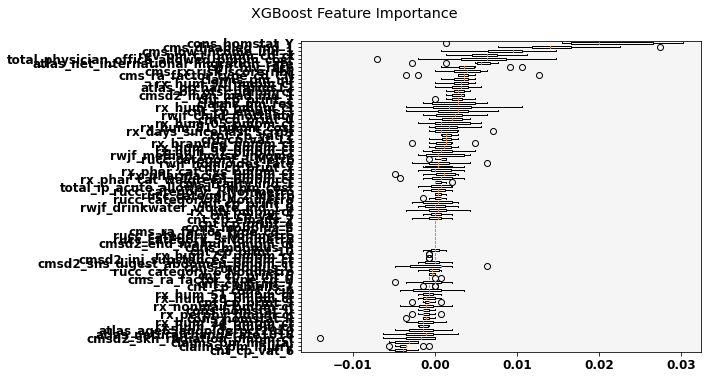

In [ ]:
# permutation testing
from sklearn.inspection import permutation_importance

clf = xgb_cl # don't forget to update title!

result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(20, 10))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
fig.suptitle('XGBoost Feature Importance', y=1.05) # don't forget to update title!
fig.tight_layout()
plt.show()

In [ ]:
fea_imp_index = perm_sorted_idx.tolist()
fea_imp_index_top20 = fea_imp_index[-30:]
fea_imp_index_top20.reverse()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Permutation Importance')

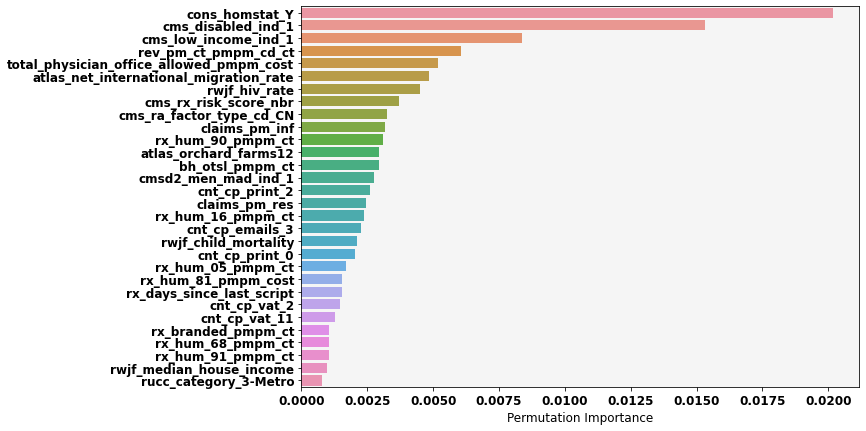

In [ ]:
from matplotlib.figure import Figure
plt.figure(figsize=(10,7))
sorted_idx = result.importances_mean.argsort()
sns.barplot(result.importances_mean[fea_imp_index_top20],X.columns[fea_imp_index_top20],orient='h')
plt.xlabel("Permutation Importance")

# **Shap Value**

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 33.2 MB/s eta 0:00:00


In [ ]:
#X_test_df = pd.DataFrame(X_test,columns=X.columns)

In [ ]:
#X_test_df.shape


In [ ]:
#test_df = X_test_df.loc[:,~X_test_df.columns.duplicated()]

In [ ]:
#test_df.shape

In [ ]:
import shap
import xgboost
model = xgboost.XGBClassifier().fit(X,y)
# Fits the model on the data
#model.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
#explainer = shap.Explainer(model,X_test)
shap_values = explainer.shap_values(X)
shap_interaction_values = explainer.shap_interaction_values(X)

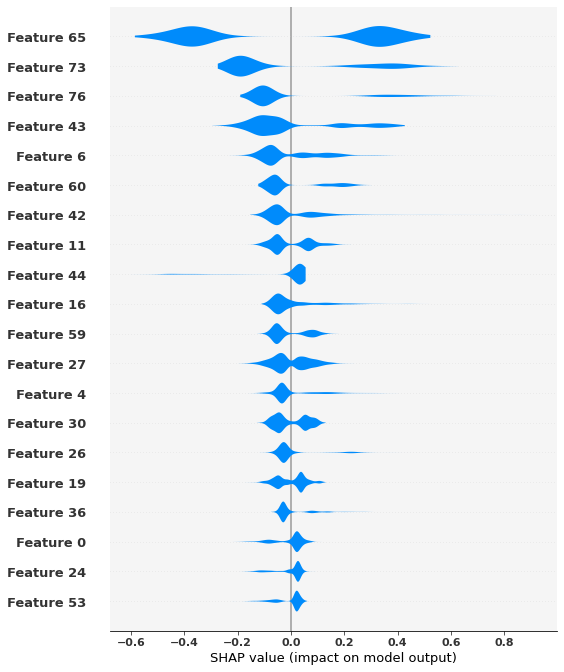

In [ ]:
plt.figure(figsize=(9,7))
#shap.plots.beeswarm(shap_values)
#shap_values.features_names=X.columns.tolist()
#shap.waterfall_plot(shap_values[0])
shap.summary_plot(shap_values, plot_type='violin')
#shap.plots.force(shap_values[0])
#shap.plots.bar(shap_values,max_display=30)

In [ ]:
X.columns

Index(['rwjf_homicides_rate', 'cons_ccip', 'atlas_age65andolderpct2010',
       'rwjf_child_mortality', 'rwjf_median_house_income',
       'cmsd2_end_malnut_pmpm_ct', 'claims_pm_mental', 'claims_pm_injury',
       'claims_pm_inf', 'claims_pm_res', 'rx_hum_28_pmpm_ct', 'cnt_cp_print_0',
       'rx_hum_81_pmpm_cost', 'cnt_cp_print_1', 'cnt_cp_print_7',
       'cmsd2_sns_digest_abdomen_pmpm_ct', 'atlas_naturalchangerate1016',
       'rx_hum_91_pmpm_ct', 'rx_nonmail_pmpm_ct', 'rx_hum_16_pmpm_ct',
       'cnt_cp_print_8', 'rx_hum_05_pmpm_ct', 'cnt_cp_vat_11', 'cnt_cp_vat_5',
       'cnt_cp_vat_6', 'total_ip_acute_allowed_pmpm_cost',
       'rx_days_since_last_script', 'atlas_net_international_migration_rate',
       'cnt_cp_print_2', 'cnt_cp_emails_7', 'rx_hum_24_pmpm_ct',
       'rx_hum_77_pmpm_ct', 'rx_hum_68_pmpm_ct', 'rx_phar_cat_cvs_pmpm_ct',
       'cnt_cp_print_9', 'cmsd2_inj_substances_pmpm_ct',
       'rev_pm_ct_pmpm_cd_ct', 'rx_pharmacies_pmpm_ct', 'cnt_cp_vat_2',
       'rx_brand

In [ ]:
X_test_float= X_test.astype(float)

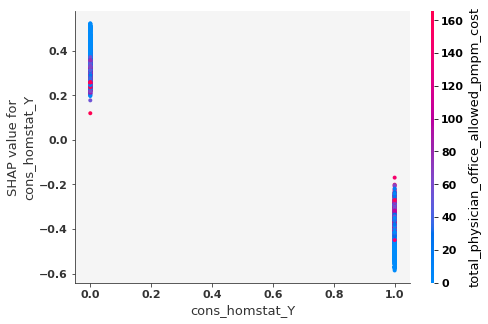

In [ ]:
#shap.dependence_plot('rx_hum_05_pmpm_ct',shap_values,X)
shap.dependence_plot('cons_homstat_Y', shap_values,X)

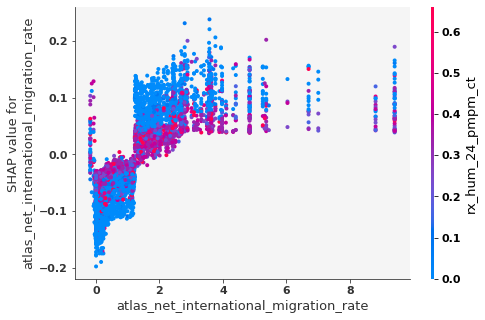

In [ ]:
shap.dependence_plot('atlas_net_international_migration_rate', shap_values ,X)


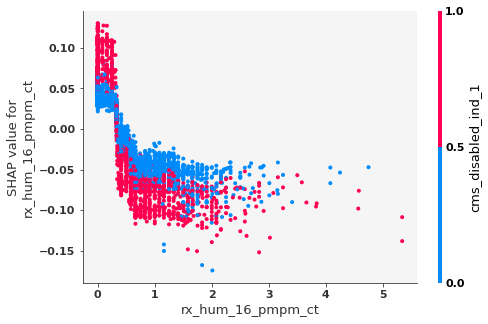

In [ ]:
shap.dependence_plot('rx_hum_16_pmpm_ct', shap_values,X)

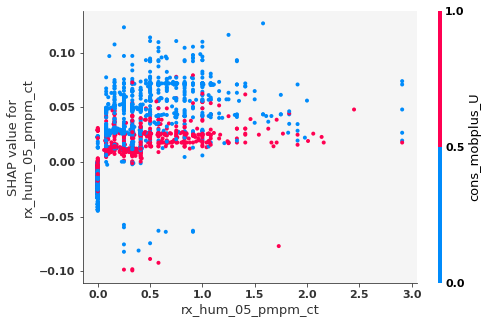

In [ ]:
shap.dependence_plot('rx_hum_05_pmpm_ct', shap_values,X)

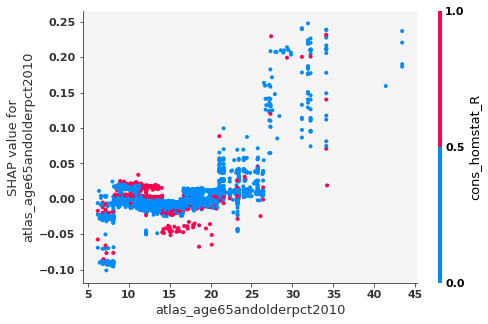

In [ ]:
shap.dependence_plot('atlas_age65andolderpct2010', shap_values,X)

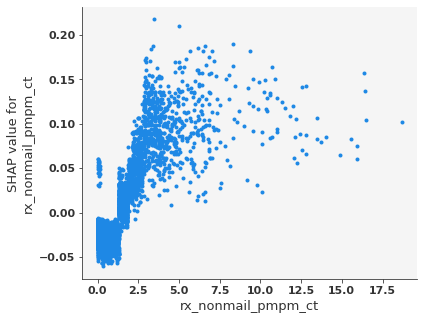

In [ ]:
shap.dependence_plot('rx_nonmail_pmpm_ct', shap_values,X,interaction_index=None)

In [ ]:
updated_model['cms_rx_risk_score_nbr'].max()

1.79

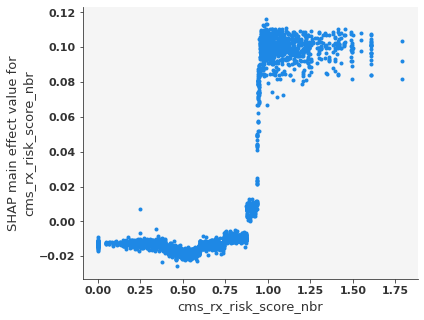

In [ ]:
shap.dependence_plot(('cms_rx_risk_score_nbr','cms_rx_risk_score_nbr'), shap_interaction_values,X,interaction_index=None)

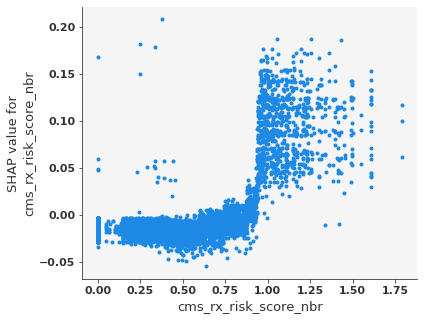

In [ ]:
shap.dependence_plot('cms_rx_risk_score_nbr', shap_values,X,interaction_index=None)

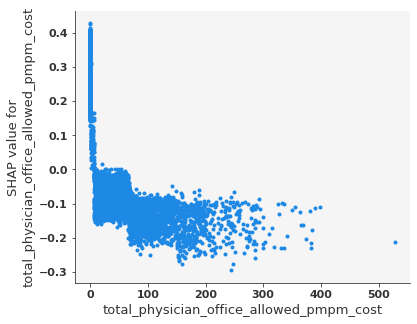

In [ ]:
shap.dependence_plot('total_physician_office_allowed_pmpm_cost', shap_values,X,interaction_index=None)